<a href="https://colab.research.google.com/github/parkrye/Python/blob/main/202101_KNUBootCamp/MiniProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 미니 프로젝트(1)

## 먼저 필요한 라이브러리들을 import 하고 환경을 만듭니다

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [ ]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 나눔바른고딕 폰트 설치 - [런타임 다시 시작]되면 폰트를 다시 설치해야 한글이 보입니다.
!apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [ ]:
# 한글폰트 설치하기 위해 필요함
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

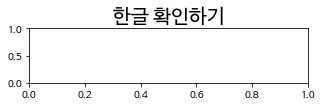

In [ ]:
# 한글이 잘 보이는지 확인하기
plt.figure(figsize=(5,1))
plt.title('한글 확인하기', fontsize=20)
plt.show()

In [ ]:
plt.rc('font', family = 'NanumBarunGothic')
# 마이너스(음수)부호 설정
plt.rc("axes", unicode_minus = False)

# 1.춘천의 기온 데이터 분석하기

### 1-0.데이터파일 준비

In [ ]:
file_path = "/content/drive/MyDrive/Colab_Notebooks/미니프로젝트/춘천기온데이터.csv"

## 1-1.기온이 가장 높은 날

### (1) csv를 이용해 봅시다

csv모듈을 이용해 파일 읽는 연습을 해 봅시다.
- file을 read모드로 오픈하고 csv.reader()로 읽어옵니다.
- 기온이 가장 높았던 날짜와 기온을 출력합니다.

In [ ]:
data = pd.read_csv(file_path, encoding = 'CP949')

In [ ]:
list_c = data.columns.to_list()
list_c
print('데이터 구성', list_c)

maxi_temp = max(data['최고기온(℃)'])
maxi_date = data[data['최고기온(℃)'] == maxi_temp]['날짜'].to_list()[0]

print('1997년 이후로 춘천에서 최고 기온이 가장 높았던 날은 {}로 기온은 {}도 였습니다.'
        .format(maxi_date, maxi_temp))

데이터 구성['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
1997년 이후로 춘천에서 최고 기온이 가장 높았던 날은 2018-08-01로 기온은 39.5도 였습니다.


- 기온이 가장 높았던 날짜와 기온, 가장 낮았던 날짜와 기온을 모두 출력합니다.

In [ ]:
mini_temp = min(data['최저기온(℃)'])
mini_date = data[data['최저기온(℃)'] == mini_temp]['날짜'].to_list()[0]

print('{}의 최고온도 : {}'.format(maxi_date, maxi_temp))
print('{}의 최저온도 : {}'.format(mini_date, mini_temp))

2018-08-01의 최고온도 : 39.5
2001-01-15의 최저온도 : -24.5


- 기온이 비어있는 날, 춘천의 최고온도 리스트를 만들고자 한다

In [ ]:
print(list_c)
print('{}에 최고온도는 {}도였고, {}에 최저온도는 {}도였습니다'.format(maxi_date, maxi_temp, mini_date, mini_temp))
print('최고기온이 관측되지 않은 날 : ', end = '')
non_maxi_list = data[data['최고기온(℃)'].isnull() == True]
print(non_maxi_list.iloc[::]['날짜'].to_list())
maxi_list = data['최고기온(℃)'].to_list()
print('최고기온 :', maxi_list)

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
2018-08-01에 최고온도는 39.5도였고, 2001-01-15에 최저온도는 -24.5도였습니다
최고기온이 관측되지 않은 날 : []
최고기온 : [4.2, -5.1, -1.2, 0.4, 2.8, -3.4, -2.4, -2.9, -1.9, 1.0, 1.0, 1.1, 0.1, 1.5, -1.7, 3.2, 3.3, 1.9, 1.1, 4.7, -1.5, -1.8, -1.7, -0.5, 0.3, 5.8, 2.2, -0.5, -0.5, 1.5, -1.8, 2.5, 2.5, 3.8, 4.2, 5.3, 2.8, 4.9, 5.9, 9.6, 3.5, 1.8, 2.8, 4.5, 7.3, 7.8, 1.3, 2.8, 2.0, 6.9, 9.3, 4.3, 7.5, 10.4, 14.0, 4.0, 12.4, 15.3, 4.8, 10.3, 5.6, 6.6, 8.8, 14.6, 5.1, 12.5, 12.9, 14.7, 10.1, 15.9, 17.6, 20.9, 10.2, 5.3, 6.1, 12.0, 13.5, 15.1, 17.0, 14.8, 13.9, 6.4, 12.6, 16.5, 17.2, 19.4, 18.6, 16.8, 8.2, 11.7, 18.1, 11.4, 13.4, 13.1, 17.3, 12.0, 20.5, 18.7, 15.8, 17.9, 17.7, 20.1, 22.4, 22.9, 19.9, 18.5, 13.2, 20.0, 21.7, 23.4, 23.0, 21.1, 21.2, 21.0, 21.1, 23.5, 23.5, 22.8, 19.7, 23.1, 24.0, 24.1, 28.2, 21.1, 28.8, 21.7, 19.7, 12.9, 21.3, 23.2, 24.9, 21.7, 16.0, 17.6, 22.8, 23.7, 23.7, 25.4, 19.9, 18.2, 19.0, 22.6, 15.2, 15.5, 22.6, 21.9, 23.7, 23.1, 19.0, 19.2, 23.9, 28.6, 21.2, 

### (2) pandas를 이용해 봅시다

- 앞에서처럼 chuncheon_high리스트에 일일이 append하지 않고 한 번에 list를 만들고 싶다

In [ ]:
with open(file_path, 'r', encoding = 'CP949') as f:
  data2 = csv.reader(f)

  for row in data2:
    print(row)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['2008-05-04', '101', '17.4', '13.9', '22.1']
['2008-05-05', '101', '16.9', '10.4', '22.4']
['2008-05-06', '101', '15.9', '6.4', '24.1']
['2008-05-07', '101', '13.2', '7.3', '20.9']
['2008-05-08', '101', '16.7', '11.7', '24.8']
['2008-05-09', '101', '16.1', '9.4', '21.4']
['2008-05-10', '101', '13', '6.2', '19.5']
['2008-05-11', '101', '14', '5.2', '23']
['2008-05-12', '101', '14.1', '8.5', '19.4']
['2008-05-13', '101', '12', '8.9', '15.5']
['2008-05-14', '101', '13.5', '7.7', '17.6']
['2008-05-15', '101', '13.8', '6', '21.2']
['2008-05-16', '101', '14.9', '6.5', '22.9']
['2008-05-17', '101', '16.7', '8.5', '25.1']
['2008-05-18', '101', '12.6', '10.9', '14.3']
['2008-05-19', '101', '13.6', '8.4', '19.2']
['2008-05-20', '101', '14', '7.1', '22.5']
['2008-05-21', '101', '15.4', '9.6', '22.7']
['2008-05-22', '101', '19', '10.9', '27.1']
['2008-05-23', '101', '20.4', '15.5', '25.5']
['2008-05-24', '101', '21.1', '15.3', '29.4']
['2008-05-25', '101', '21.

In [ ]:
max_temp = -999
max_date = ''

with open(file_path, 'r', encoding = 'CP949') as f:
  data2 = csv.reader(f)
  header = next(data2)
  print(f'데이터 구성{header}')

  for row in data2:
    if row[-1] == '':
      row[-1] = -999

    row[-1] = float(row[-1])
    if max_temp < row[-1]:
      max_temp = row[-1]
      max_date = row[0]

print(f'1997년 이후로 춘천에서 최고 기온이 가장 높았던 날은 {max_date}로 기온은 {max_temp}도 였습니다.')

데이터 구성['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
1997년 이후로 춘천에서 최고 기온이 가장 높았던 날은 2018-08-01로 기온은 39.5도 였습니다.


In [ ]:
min_temp = 999
min_date = ''

with open(file_path, 'r', encoding = 'CP949') as f:
  data2 = csv.reader(f)
  header = next(data2)
  print(f'데이터 구성{header}')

  for row in data2:
    if row[-1] == '':
      row[-1] = 999

    row[-1] = float(row[-1])
    if min_temp > row[-1]:
      min_temp = row[-1]
      min_date = row[0]

print(f'{max_date}의 최고온도 : {max_temp}도.')
print(f'{min_date}의 최저온도 : {min_temp}도')

데이터 구성['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
2018-08-01의 최고온도 : 39.5도.
2001-01-15의 최저온도 : -10.4도


In [ ]:
non_list = []
max_list = []

with open(file_path, 'r', encoding = 'CP949') as f:
  data2 = csv.reader(f)
  header = next(data2)
  print(f'데이터 구성{header}')

  for row in data2:
    if row[-1] == '':
      non_list.append(row[-1])
    else:
      max_list.append(row[-1])

print(f'{max_date}의 최고온도 : {max_temp}도.')
print(f'{min_date}의 최저온도 : {min_temp}도')
print('최고기온이 관측되지 않은 날 :', non_list)
print('최고기온 :', max_list)

데이터 구성['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
2018-08-01의 최고온도 : 39.5도.
2001-01-15의 최저온도 : -10.4도
최고기온이 관측되지 않은 날 : []
최고기온 : ['4.2', '-5.1', '-1.2', '0.4', '2.8', '-3.4', '-2.4', '-2.9', '-1.9', '1', '1', '1.1', '0.1', '1.5', '-1.7', '3.2', '3.3', '1.9', '1.1', '4.7', '-1.5', '-1.8', '-1.7', '-0.5', '0.3', '5.8', '2.2', '-0.5', '-0.5', '1.5', '-1.8', '2.5', '2.5', '3.8', '4.2', '5.3', '2.8', '4.9', '5.9', '9.6', '3.5', '1.8', '2.8', '4.5', '7.3', '7.8', '1.3', '2.8', '2', '6.9', '9.3', '4.3', '7.5', '10.4', '14', '4', '12.4', '15.3', '4.8', '10.3', '5.6', '6.6', '8.8', '14.6', '5.1', '12.5', '12.9', '14.7', '10.1', '15.9', '17.6', '20.9', '10.2', '5.3', '6.1', '12', '13.5', '15.1', '17', '14.8', '13.9', '6.4', '12.6', '16.5', '17.2', '19.4', '18.6', '16.8', '8.2', '11.7', '18.1', '11.4', '13.4', '13.1', '17.3', '12', '20.5', '18.7', '15.8', '17.9', '17.7', '20.1', '22.4', '22.9', '19.9', '18.5', '13.2', '20', '21.7', '23.4', '23', '21.1', '21.2', '21', '21.1', '23.5', '23.5', '2

## 1-2.기온변화그래프

### pandas,matplotlib 사용해서 최고기온 그래프 그리기

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       9141 non-null   object 
 1   지점       9141 non-null   int64  
 2   평균기온(℃)  9140 non-null   float64
 3   최저기온(℃)  9141 non-null   float64
 4   최고기온(℃)  9141 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 357.2+ KB


In [ ]:
# 최고기온
data['최고기온(℃)']

0       4.2
1      -5.1
2      -1.2
3       0.4
4       2.8
       ... 
9136    5.5
9137    5.1
9138    3.0
9139    6.3
9140    2.6
Name: 최고기온(℃), Length: 9141, dtype: float64

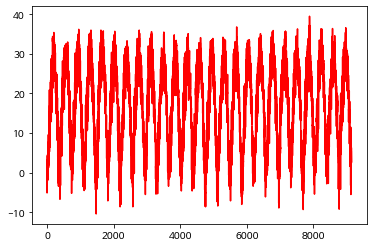

In [ ]:
# 최고기온을 그래프로 그립니다
# ==> 최고기온 뿐만 아니라, 최저기온, 평균기온 그래프도 그려봅시다

# 그래프 색깔도 파란색으로 바꿔봅시다
# r:red, g:green, b:blue, k:black, y:yellow

plt.plot(data['최고기온(℃)'], 'r')

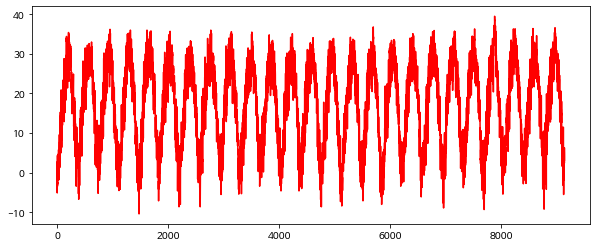

In [ ]:
# 그래프 크기를 바꿔봅시다(figsize)

plt.figure(figsize = (10, 4))
plt.plot(data['최고기온(℃)'], 'r')

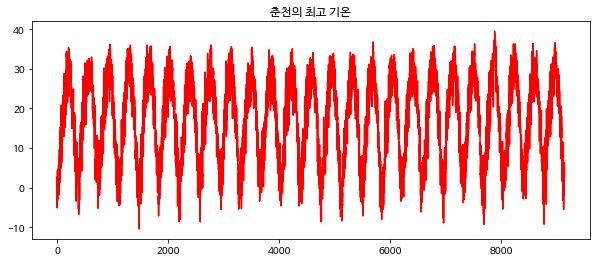

In [ ]:
# 그래프에 '춘천의 최고 기온'이라고 제목을 넣습니다

plt.figure(figsize = (10, 4))
plt.title('춘천의 최고 기온')
plt.plot(data['최고기온(℃)'], 'r')

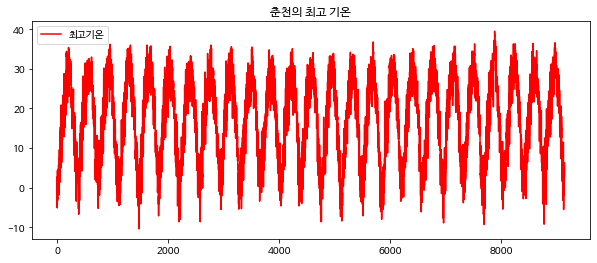

In [ ]:
# 범례를 넣어봅시다.

plt.figure(figsize = (10, 4))
plt.title('춘천의 최고 기온')
plt.plot(data['최고기온(℃)'], 'r', label = '최고기온')
plt.legend()

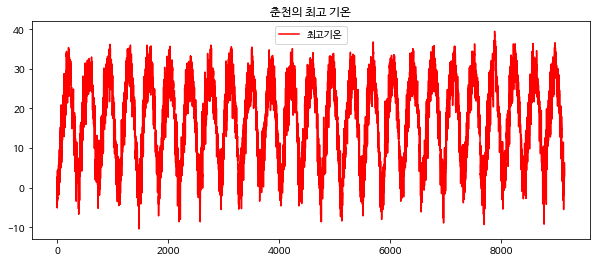

In [ ]:
# 범례의 위치를 지정해 봅니다 (loc)
# 2, 9, 1
# 6, 10, 5/7
# 3, 8, 4

plt.figure(figsize = (10, 4))
plt.title('춘천의 최고 기온')
plt.plot(data['최고기온(℃)'], 'r', label = '최고기온')
plt.legend(loc = 9)

### [미션] 최저기온, 평균기온 그래프도 그려봅시다

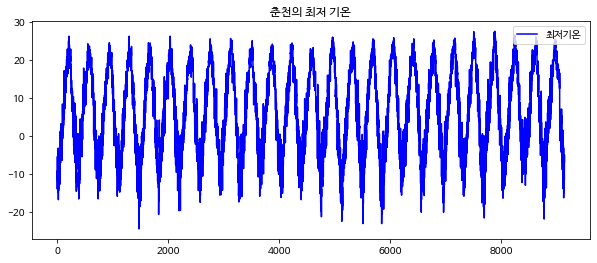

In [ ]:
plt.figure(figsize = (10, 4))
plt.title('춘천의 최저 기온')
plt.plot(data['최저기온(℃)'], 'b', label = '최저기온')
plt.legend(loc = 'upper right')

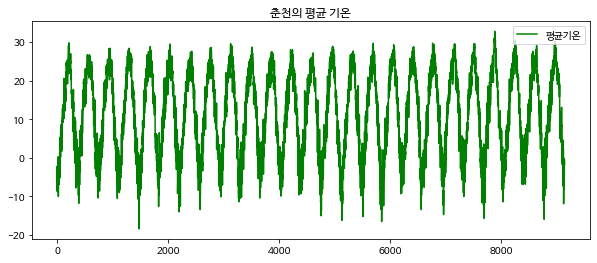

In [ ]:
plt.figure(figsize = (10, 4))
plt.title('춘천의 평균 기온')
plt.plot(data['평균기온(℃)'], 'g', label = '평균기온')
plt.legend(loc = 'upper right')

### X축에 일련번호가 아닌 날짜 넣기

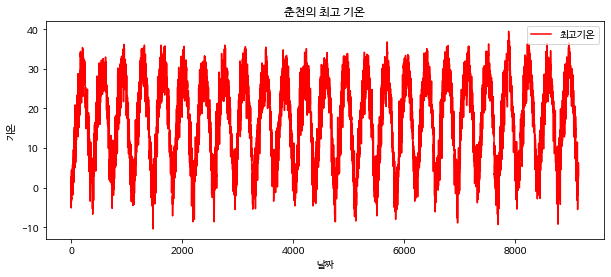

In [ ]:
plt.figure(figsize = (10, 4))
plt.title('춘천의 최고 기온')
plt.plot(data['최고기온(℃)'], 'r', label = '최고기온')
plt.xlabel('날짜')
plt.ylabel('기온')
plt.legend(loc = 'upper right')

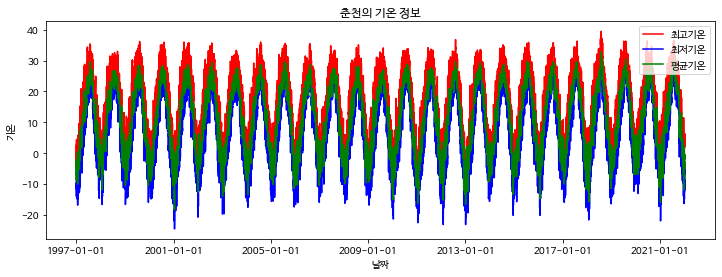

In [ ]:
plt.figure(figsize = (12, 4))
plt.title('춘천의 기온 정보')

plt.plot(data['날짜'], data['최고기온(℃)'], 'r', label = '최고기온')
plt.plot(data['날짜'], data['최저기온(℃)'], 'b', label = '최저기온')
plt.plot(data['날짜'], data['평균기온(℃)'], 'g', label = '평균기온')

plt.xlabel('날짜')
plt.ylabel('기온')
plt.legend(loc = 'upper right')

plt.xticks(np.arange(0, 9141, 1461))
plt.show()

In [ ]:
# 위의 그래프를 보면 x축이 일련번호(인덱스)인 것을 볼 수 있습니다
# 날짜에서 '월'만 뽑아 인덱스로 만듭니다.
data.index = pd.DatetimeIndex(data['날짜']).month
data.rename_axis(index = '월', inplace = True)
data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
월,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2
1,1997-01-02,101,-8.7,-11.1,-5.1
1,1997-01-03,101,-8.1,-14.0,-1.2
1,1997-01-04,101,-6.8,-13.0,0.4
1,1997-01-05,101,-2.1,-5.4,2.8
...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5
1,2022-01-07,101,-4.9,-11.7,5.1
1,2022-01-08,101,-3.0,-11.3,3.0


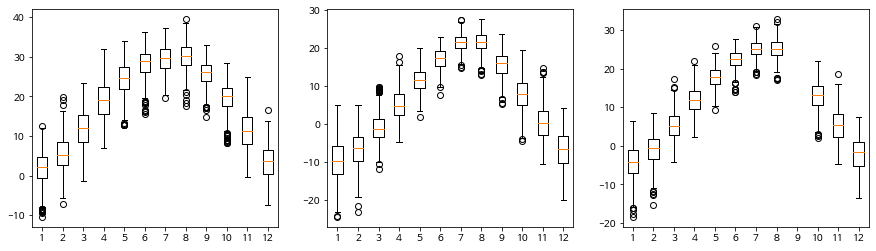

In [ ]:
# 각 월별로 최고기온을 boxplot으로 그려봅니다
fig, ax = plt.subplots(1, 3, figsize = (15, 4))
ax[0].boxplot([data.loc[i]['최고기온(℃)'].tolist() for i in range(1, 13)])
ax[1].boxplot([data.loc[i]['최저기온(℃)'].tolist() for i in range(1, 13)])
ax[2].boxplot([data.loc[i]['평균기온(℃)'].tolist() for i in range(1, 13)])
plt.show()

## 1-3. 내 생일의 기온변화

### (1) csv를 이용해 봅시다

In [ ]:
data['일'] = pd.DatetimeIndex(data['날짜']).day
data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일
월,,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2,1
1,1997-01-02,101,-8.7,-11.1,-5.1,2
1,1997-01-03,101,-8.1,-14.0,-1.2,3
1,1997-01-04,101,-6.8,-13.0,0.4,4
1,1997-01-05,101,-2.1,-5.4,2.8,5
...,...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5,6
1,2022-01-07,101,-4.9,-11.7,5.1,7
1,2022-01-08,101,-3.0,-11.3,3.0,8


In [ ]:
# 내 생일(2월 8일) 최고기온 데이터만 모아서 그래프로 나타내 봅니다
birthMaxi = []
birthMini = []
for row in data:
  print(row)
  if row.index == '5' and row['일'] == '10':
    birthMaxi.append(row[-1])
    birthMini.append(row[-1])

print(birthMaxi)
print(birthMini)

날짜
지점
평균기온(℃)
최저기온(℃)
최고기온(℃)
일
[]
[]


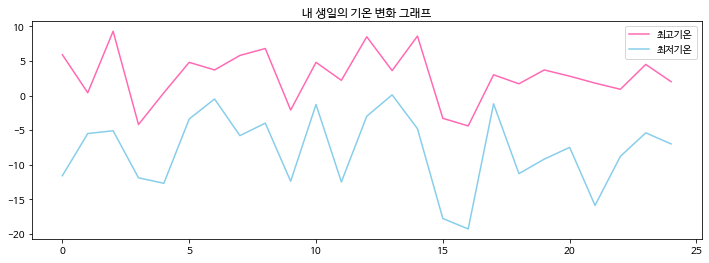

In [ ]:
# 내 생일(2월 8일)의 최고기온(빨간색)과 최저기온(파란색) 데이터만 모아서 그래프로 나타내 봅니다




### (2) pandas를 이용해 봅니다

In [ ]:
data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일
월,,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2,1
1,1997-01-02,101,-8.7,-11.1,-5.1,2
1,1997-01-03,101,-8.1,-14.0,-1.2,3
1,1997-01-04,101,-6.8,-13.0,0.4,4
1,1997-01-05,101,-2.1,-5.4,2.8,5
...,...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5,6
1,2022-01-07,101,-4.9,-11.7,5.1,7
1,2022-01-08,101,-3.0,-11.3,3.0,8


In [ ]:
# 날짜를 가지고 'new_Date'라는 컬럼을 만들어 봅니다
data['월'] = pd.DatetimeIndex(data['날짜']).month
data['연'] = pd.DatetimeIndex(data['날짜']).year

In [ ]:
data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일,월,연
월,,,,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2,1,1,1997
1,1997-01-02,101,-8.7,-11.1,-5.1,2,1,1997
1,1997-01-03,101,-8.1,-14.0,-1.2,3,1,1997
1,1997-01-04,101,-6.8,-13.0,0.4,4,1,1997
1,1997-01-05,101,-2.1,-5.4,2.8,5,1,1997
...,...,...,...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5,6,1,2022
1,2022-01-07,101,-4.9,-11.7,5.1,7,1,2022
1,2022-01-08,101,-3.0,-11.3,3.0,8,1,2022


In [ ]:
# new_Date를 인덱스로 지정합니다

data.index = data['월']
data.rename_axis(index = '일자', inplace = True)
data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일,월,연
일자,,,,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2,1,1,1997
1,1997-01-02,101,-8.7,-11.1,-5.1,2,1,1997
1,1997-01-03,101,-8.1,-14.0,-1.2,3,1,1997
1,1997-01-04,101,-6.8,-13.0,0.4,4,1,1997
1,1997-01-05,101,-2.1,-5.4,2.8,5,1,1997
...,...,...,...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5,6,1,2022
1,2022-01-07,101,-4.9,-11.7,5.1,7,1,2022
1,2022-01-08,101,-3.0,-11.3,3.0,8,1,2022


In [ ]:
# 이번에는 '월'를 인덱스로 지정해 봅니다
data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일,월,연
일자,,,,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2,1,1,1997
1,1997-01-02,101,-8.7,-11.1,-5.1,2,1,1997
1,1997-01-03,101,-8.1,-14.0,-1.2,3,1,1997
1,1997-01-04,101,-6.8,-13.0,0.4,4,1,1997
1,1997-01-05,101,-2.1,-5.4,2.8,5,1,1997
...,...,...,...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5,6,1,2022
1,2022-01-07,101,-4.9,-11.7,5.1,7,1,2022
1,2022-01-08,101,-3.0,-11.3,3.0,8,1,2022


In [ ]:
# 인덱스값 중에 unique한 값만 찾아봅니다 (여기서는 1월~12월까지 12개)




Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='월')

In [ ]:
# 2월에 해당하는 행만 출력해 봅니다




            날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
월                                             
2   1997-02-01  101     -5.4     -9.6      2.5
2   1997-02-02  101     -5.6    -11.8      2.5
2   1997-02-03  101     -5.1    -12.1      3.8
2   1997-02-04  101     -4.1    -11.8      4.2
2   1997-02-05  101     -1.8     -9.0      5.3
..         ...  ...      ...      ...      ...
2   2021-02-24  101      0.7     -6.7     11.3
2   2021-02-25  101      0.1     -4.2      5.8
2   2021-02-26  101      4.4     -3.8     13.5
2   2021-02-27  101      6.1     -0.3     13.1
2   2021-02-28  101      5.2     -2.3     11.4

[706 rows x 5 columns]


In [ ]:
# 2월의 최고 기온과 최저 기온 리스트를 만듭니다



최고 기온: [2.5, 2.5, 3.8, 4.2, 5.3, 2.8, 4.9, 5.9, 9.6, 3.5, 1.8, 2.8, 4.5, 7.3, 7.8, 1.3, 2.8, 2.0, 6.9, 9.3, 4.3, 7.5, 10.4, 14.0, 4.0, 12.4, 15.3, 4.8, 5.1, 6.7, 5.1, 5.2, 6.0, 7.4, 3.1, 0.4, -3.2, 2.6, 6.1, 13.2, 2.9, 5.3, 6.9, 9.6, 9.8, 10.4, 11.7, 10.9, 6.1, 12.8, 13.7, 10.2, 15.9, 13.5, 4.4, 7.5, 8.4, 0.2, -1.9, 0.6, 4.9, 6.0, 9.6, 9.3, 6.1, 6.5, 6.2, -0.3, 2.5, 3.1, 8.1, 8.8, 9.1, 11.3, 3.3, 2.3, 4.9, 7.7, 9.5, 6.6, 10.0, 8.0, 5.6, 6.1, -1.4, 2.5, 0.9, 3.2, 2.2, 4.6, 2.6, -4.2, 1.0, 3.8, 5.8, 5.7, 4.0, 4.2, -1.4, 0.2, 1.2, 4.5, 7.6, 6.5, 3.8, 6.5, 3.9, 2.1, 1.8, 4.3, 5.3, 2.6, 6.1, -0.1, -2.1, 2.5, 6.2, 6.7, 4.8, 4.7, 0.4, 2.3, 2.2, 2.7, 2.8, 2.4, 1.1, -4.1, -0.8, -0.5, 5.1, 9.2, 9.6, 11.5, 13.5, 5.2, 1.8, 3.2, 7.6, 8.2, 4.7, 2.3, 8.7, 10.1, 5.7, 10.6, 8.0, 10.0, 4.8, 2.5, 3.1, 2.5, 4.0, 6.1, 7.0, 8.1, 4.7, 4.3, 2.8, 5.9, 9.0, 6.6, 11.1, 11.6, 12.7, 10.0, 12.5, 12.8, 15.5, 4.7, 5.3, 4.5, 3.9, 4.9, 5.2, 5.2, 3.7, 1.9, 7.3, 4.9, 1.6, 5.6, 8.8, 10.6, 11.0, 12.8, 8.9, 6.1, 7.1, 3.9, 3

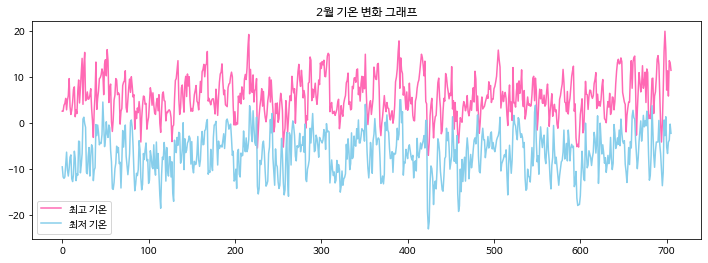

In [ ]:
data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일,월,연
일자,,,,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2,1,1,1997
1,1997-01-02,101,-8.7,-11.1,-5.1,2,1,1997
1,1997-01-03,101,-8.1,-14.0,-1.2,3,1,1997
1,1997-01-04,101,-6.8,-13.0,0.4,4,1,1997
1,1997-01-05,101,-2.1,-5.4,2.8,5,1,1997
...,...,...,...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5,6,1,2022
1,2022-01-07,101,-4.9,-11.7,5.1,7,1,2022
1,2022-01-08,101,-3.0,-11.3,3.0,8,1,2022


In [ ]:
tmp = data.iloc[data.index == 5, 2:]
birthday = tmp.loc[tmp['일'] == 10]
birthday

,평균기온(℃),최저기온(℃),최고기온(℃),일,월,연
일자,,,,,,
5,14.8,5.9,23.2,10,5,1997
5,15.8,11.1,21.8,10,5,1998
5,16.2,10.9,23.2,10,5,1999
5,13.3,12.0,15.4,10,5,2000
5,14.4,6.1,22.1,10,5,2001
5,18.1,13.4,23.9,10,5,2002
5,14.9,6.9,24.4,10,5,2003
5,16.3,14.1,18.5,10,5,2004
5,13.2,5.5,21.4,10,5,2005


In [ ]:
# new_Date과 Birthday 컬럼을 만듭니다



,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),new_Date,년월일
월,,,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2,1997-01-01,1997-01-01
1,1997-01-02,101,-8.7,-11.1,-5.1,1997-01-02,1997-01-02
1,1997-01-03,101,-8.1,-14.0,-1.2,1997-01-03,1997-01-03
1,1997-01-04,101,-6.8,-13.0,0.4,1997-01-04,1997-01-04
1,1997-01-05,101,-2.1,-5.4,2.8,1997-01-05,1997-01-05


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),new_Date,년월일
월일,,,,,,,
01-01,1997-01-01,101,-2.4,-9.8,4.2,1997-01-01,1997-01-01
01-02,1997-01-02,101,-8.7,-11.1,-5.1,1997-01-02,1997-01-02
01-03,1997-01-03,101,-8.1,-14.0,-1.2,1997-01-03,1997-01-03
01-04,1997-01-04,101,-6.8,-13.0,0.4,1997-01-04,1997-01-04
01-05,1997-01-05,101,-2.1,-5.4,2.8,1997-01-05,1997-01-05


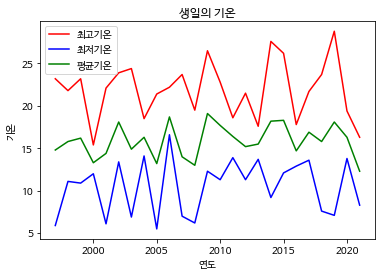

In [ ]:
plt.plot(birthday['연'], birthday['최고기온(℃)'], 'r', label = '최고기온')
plt.plot(birthday['연'], birthday['최저기온(℃)'], 'b', label = '최저기온')
plt.plot(birthday['연'], birthday['평균기온(℃)'], 'g', label = '평균기온')
plt.legend(loc = 0)
plt.title('생일의 기온')
plt.xlabel('연도')
plt.ylabel('기온')
plt.show()

[5.9, 0.4, 9.3, -4.2, 0.4, 4.8, 3.7, 5.8, 6.8, -2.1, 4.8, 2.2, 8.5, 3.6, 8.6, -3.3, -4.4, 3.0, 1.7, 3.7, 2.8, 1.8, 0.9, 4.5, 2.0]
[5.9, 0.4, 9.3, -4.2, 0.4, 4.8, 3.7, 5.8, 6.8, -2.1, 4.8, 2.2, 8.5, 3.6, 8.6, -3.3, -4.4, 3.0, 1.7, 3.7, 2.8, 1.8, 0.9, 4.5, 2.0]


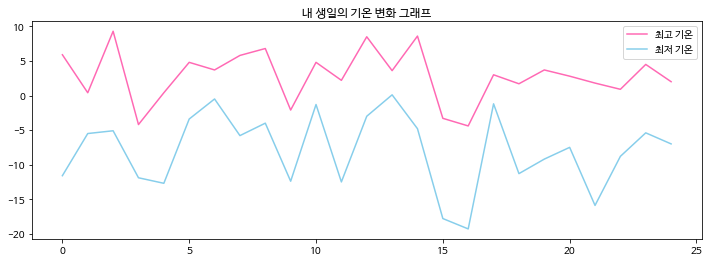

### 더 쉬운 방법

1

In [ ]:
df = data
df = df[df['월'] == 5]
df = df[df['일'] == 10]
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일,월,연
일자,,,,,,,,
5,1997-05-10,101,14.8,5.9,23.2,10,5,1997
5,1998-05-10,101,15.8,11.1,21.8,10,5,1998
5,1999-05-10,101,16.2,10.9,23.2,10,5,1999
5,2000-05-10,101,13.3,12.0,15.4,10,5,2000
5,2001-05-10,101,14.4,6.1,22.1,10,5,2001
5,2002-05-10,101,18.1,13.4,23.9,10,5,2002
5,2003-05-10,101,14.9,6.9,24.4,10,5,2003
5,2004-05-10,101,16.3,14.1,18.5,10,5,2004
5,2005-05-10,101,13.2,5.5,21.4,10,5,2005


2

In [ ]:
df2 = pd.read_csv(file_path, encoding = 'cp949')
df2.date_time = pd.to_datetime(df2.날짜)

df2['bday'] = df2.date_time.apply(lambda t : t.strftime('%m-%d'))
df2.set_index('bday', inplace = True)
df2.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
bday,,,,,
01-01,1997-01-01,101,-2.4,-9.8,4.2
01-02,1997-01-02,101,-8.7,-11.1,-5.1
01-03,1997-01-03,101,-8.1,-14.0,-1.2
01-04,1997-01-04,101,-6.8,-13.0,0.4
01-05,1997-01-05,101,-2.1,-5.4,2.8


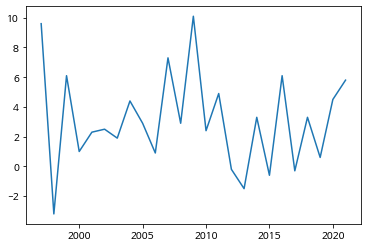

In [ ]:
year = pd.to_datetime(df2.loc['02-09'].날짜).dt.year.tolist()

plt.plot(year, df2.loc['02-09', '최고기온(℃)'])
plt.show()

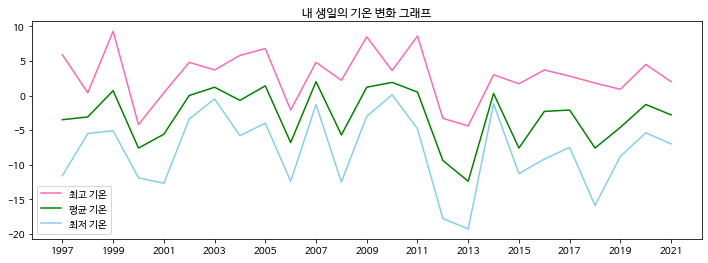

## 1-4.히스토그램으로 나타내기

### 히스토그램 리뷰

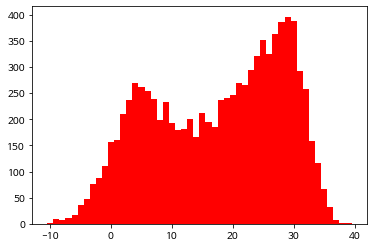

In [ ]:
df2high = df2['최고기온(℃)']
plt.hist(df2high, bins = 50, color = 'r')
plt.show()

In [ ]:
df2

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
bday,,,,,
01-01,1997-01-01,101,-2.4,-9.8,4.2
01-02,1997-01-02,101,-8.7,-11.1,-5.1
01-03,1997-01-03,101,-8.1,-14.0,-1.2
01-04,1997-01-04,101,-6.8,-13.0,0.4
01-05,1997-01-05,101,-2.1,-5.4,2.8
...,...,...,...,...,...
01-06,2022-01-06,101,-4.1,-10.2,5.5
01-07,2022-01-07,101,-4.9,-11.7,5.1
01-08,2022-01-08,101,-3.0,-11.3,3.0


### (1) 1월과 8월  데이터를 히스토그램으로 나타내기(pandas)

In [ ]:
df2['월'] = pd.DatetimeIndex(df2['날짜']).month
df2.set_index(df2['월'], inplace = True)
df2

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월
월,,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2,1
1,1997-01-02,101,-8.7,-11.1,-5.1,1
1,1997-01-03,101,-8.1,-14.0,-1.2,1
1,1997-01-04,101,-6.8,-13.0,0.4,1
1,1997-01-05,101,-2.1,-5.4,2.8,1
...,...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5,1
1,2022-01-07,101,-4.9,-11.7,5.1,1
1,2022-01-08,101,-3.0,-11.3,3.0,1


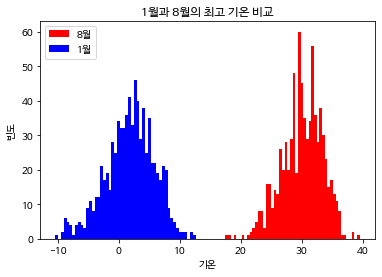

In [ ]:
df28 = df2.loc[8]['최고기온(℃)'].tolist()
plt.hist(df28, bins = 50, color = 'r', label = '8월')
df21 = df2.loc[1]['최고기온(℃)'].tolist()
plt.hist(df21, bins = 50, color = 'b', label = '1월')

plt.legend(loc = 'upper left')
plt.xlabel('기온')
plt.ylabel('빈도')
plt.title('1월과 8월의 최고 기온 비교')
plt.show()

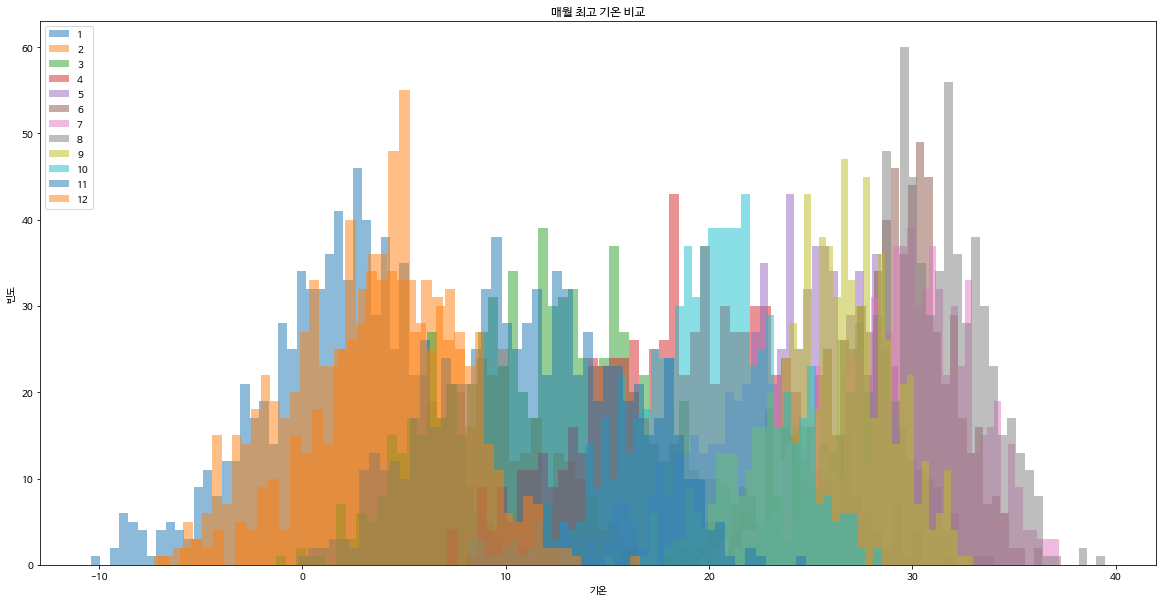

In [ ]:
plt.figure(figsize = (20, 10))

for i in range(1, 13):
  dfTmp = df2.loc[i]['최고기온(℃)'].tolist()
  plt.hist(dfTmp, bins = 50, alpha = 0.5, label = i)

plt.legend(loc = 'upper left')
plt.xlabel('기온')
plt.ylabel('빈도')
plt.title('매월 최고 기온 비교')
plt.show()

## 1-5.boxplot으로 나타내기

### (2) 월별 집계

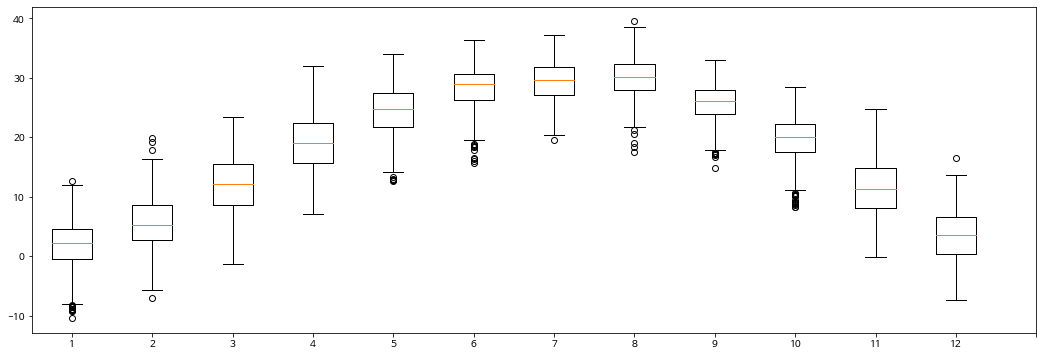

In [ ]:
dataset = []
for i in range(1, 13):
  tmp = df2.loc[i]['최고기온(℃)'].tolist()
  dataset.append(tmp)

plt.figure(figsize = (18, 6))
plt.boxplot(dataset)
plt.xticks(np.arange(13)+1)
plt.show()

### (3) pandas를 이용해 날짜별 집계(매해 8월만)

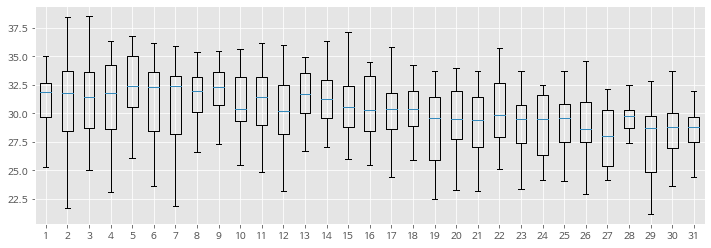

In [ ]:
df3 = df2
df3['연'] = pd.DatetimeIndex(df2['날짜']).year
df3.set_index(df3['연'], inplace = True)
df3

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월,연
연,,,,,,,
1997,1997-01-01,101,-2.4,-9.8,4.2,1,1997
1997,1997-01-02,101,-8.7,-11.1,-5.1,1,1997
1997,1997-01-03,101,-8.1,-14.0,-1.2,1,1997
1997,1997-01-04,101,-6.8,-13.0,0.4,1,1997
1997,1997-01-05,101,-2.1,-5.4,2.8,1,1997
...,...,...,...,...,...,...,...
2022,2022-01-06,101,-4.1,-10.2,5.5,1,2022
2022,2022-01-07,101,-4.9,-11.7,5.1,1,2022
2022,2022-01-08,101,-3.0,-11.3,3.0,1,2022


In [ ]:
dataset = []
for i in range(1, 13):
  tmp = df2.loc[i]['최고기온(℃)'].tolist()
  dataset.append(tmp)

plt.figure(figsize = (18, 6))
plt.boxplot(dataset)
plt.xticks(np.arange(13)+1)
plt.show()